In [1]:
# connection with google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The code snippet connects Google Drive to the Colab environment, enabling seamless access to files and directories within the specified path (`/content/drive`).

In [2]:
# Import necessary libraries
import os
import cv2
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt


The code above imports key libraries including OpenCV, Matplotlib, NumPy, Pandas, tqdm, and os for tasks like image processing, data analysis, visualization, and handling file operations.

In [3]:
# Setting the dataset path for accessing image files in the specified directory.
dataset_path = '/content/drive/MyDrive/CVPR/Animals'


This code defines the path to the dataset folder in Google Drive, where the images are stored for processing.

In [4]:
# Listing dataset categories and displaying their paths
categories = os.listdir(dataset_path)
print("Categories Found:", categories)


for idx, category in enumerate(categories):
    folder_path = os.path.join(dataset_path, category)
    print(f"Category {idx}: {category} | Path: {folder_path}")

Categories Found: ['Tiger', 'Lion', 'Leopard', 'Cheetah', 'Jaguar']
Category 0: Tiger | Path: /content/drive/MyDrive/CVPR/Animals/Tiger
Category 1: Lion | Path: /content/drive/MyDrive/CVPR/Animals/Lion
Category 2: Leopard | Path: /content/drive/MyDrive/CVPR/Animals/Leopard
Category 3: Cheetah | Path: /content/drive/MyDrive/CVPR/Animals/Cheetah
Category 4: Jaguar | Path: /content/drive/MyDrive/CVPR/Animals/Jaguar


This code lists all subdirectories (categories) in the specified dataset path, then iterates over each category, printing its index, name, and the full folder path, helping identify and verify available image classes.

In [ ]:
# Setting the number of images per row
images_per_row = 5

# Collecting all image paths and categories
image_paths = []
for category in categories:
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        image_paths.append((img_path, category))

# Calculating total images and determining number of rows
total_images = len(image_paths)
num_rows = (total_images // images_per_row) + (1 if total_images % images_per_row > 0 else 0)

# Creating subplots grid for displaying images
fig, axes = plt.subplots(num_rows, images_per_row, figsize=(images_per_row * 3, num_rows * 3))

# Flattening axes for easier access
axes = axes.flatten()

# Displaying images and their categories
for idx, (img_path, category) in enumerate(image_paths):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    axes[idx].imshow(img_rgb)
    axes[idx].set_title(f"{category}")
    axes[idx].axis('off')

# Hiding unused axes
for idx in range(total_images, len(axes)):
    axes[idx].axis('off')

# Displaying the images
plt.tight_layout()
plt.show()


The code loads and displays all available images from the dataset, arranging them in a grid with specified categories as titles.

100%|██████████| 30/30 [00:00<00:00, 63.45it/s]


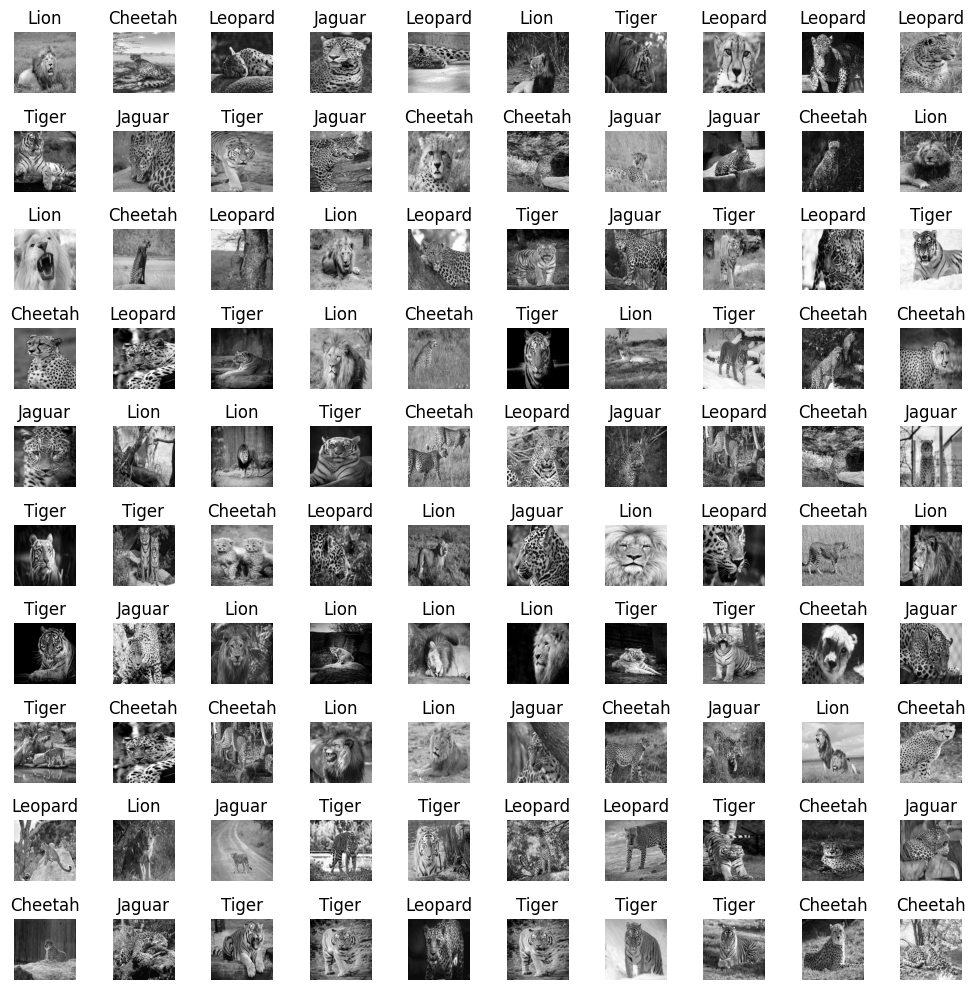

Total Processed Images: 170


In [6]:
# Image preprocessing: Convert images to grayscale and resize to 200x200
train_data = []

# Loop through each category, read images, process them, and add to train_data
for category in categories:
    path = os.path.join(dataset_path, category)
    if os.path.isdir(path):
        for img in tqdm(os.listdir(path)):
            img_path = os.path.join(path, img)
            img_array = cv2.imread(img_path)  # Read image
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img_array = cv2.resize(img_array, (200, 200))  # Resize image to 200x200
            train_data.append((img_array, category))  # Append image and label to train_data

# Shuffle the processed images to ensure randomness in training data
random.shuffle(train_data)

# Set the number of images and grid size for visualization
num_images = len(train_data)
grid_size = min(num_images, 100)  # Display a maximum of 100 images

# Create a 10x10 grid to display the images
plt.figure(figsize=(10, 10))

# Display images in a grid
i = 0
for r in range(10):
    for c in range(10):
        if i >= grid_size:
            break
        plt.subplot(10, 10, i + 1)
        plt.imshow(train_data[i][0], cmap='gray')  # Show grayscale image
        plt.title(train_data[i][1])  # Display category label as title
        plt.axis('off')  # Remove axis
        i += 1

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Output the total number of processed images
print(f"Total Processed Images: {len(train_data)}")


The code processes images by converting them to grayscale, resizing them to 200x200, and shuffling the dataset before displaying a grid of up to  images along with their corresponding category labels.

In [7]:
# Splits the training data into 5 folds for 5-fold cross-validation.

fold_size = len(train_data) // 5
folds = []

start_idx = 0
for i in range(5):
    end_idx = start_idx + fold_size
    folds.append(train_data[start_idx:end_idx])
    start_idx = end_idx


for i, fold in enumerate(folds):
      print(f"Fold {i + 1} : total images- {len(fold)} ")

Fold 1 : total images- 34 
Fold 2 : total images- 34 
Fold 3 : total images- 34 
Fold 4 : total images- 34 
Fold 5 : total images- 34 


This code splits the training data into 5 folds for cross-validation and prints the total number of images in each fold.

In [8]:
# Calculation of Euclidian distance

def calculate_distance(img1, img2):
    return np.sqrt(np.sum((img1 - img2) ** 2))


first_image = train_data[0][0]
second_image = train_data[1][0]


distance = calculate_distance(first_image, second_image)

print(f"Distance between the first two images: {distance}")


Distance between the first two images: 2096.9721028187287


This code defines a function to calculate the Euclidean distance between two images and then computes the distance between the first two images

In [10]:
# Perform 5-fold cross-validation for KNN classifier(Calculation of avg. accuracy)

def perform_k_fold_validation(folds, k_values):
    accuracies = {k: [] for k in k_values}

    for K in k_values:
        print(f"\nEvaluating K = {K}...")
        for i in range(5):
            # Prepare training and testing data
            train_folds = [f for j, f in enumerate(folds) if j != i]
            train_data = [img for fold in train_folds for img in fold]
            train_images, train_labels = zip(*train_data)

            test_data = folds[i]
            test_images, test_labels = zip(*test_data)

            correct_predictions = 0
            for test_img, true_label in zip(test_images, test_labels):
                prediction = knn_classifier(train_images, train_labels, test_img, K)
                if prediction == true_label:
                    correct_predictions += 1

            # Accuracy for the current fold
            fold_accuracy = correct_predictions / len(test_labels)
            print(f"Fold {i+1} accuracy: {fold_accuracy:.2f}")
            accuracies[K].append(fold_accuracy)

    return accuracies

# Run cross-validation and print the accuracy for each fold and K
k_values = range(1, 31)
accuracies = perform_k_fold_validation(folds, k_values)

# Calculate and print the average accuracy for each K
average_accuracies = {k: np.mean(acc) for k, acc in accuracies.items()}
print("\nAverage accuracy for each K:")
for k, avg_acc in average_accuracies.items():
    print(f"K = {k}: Average Accuracy = {avg_acc:.2f}")



Evaluating K = 1...
Fold 1 accuracy: 0.29
Fold 2 accuracy: 0.29
Fold 3 accuracy: 0.38
Fold 4 accuracy: 0.18
Fold 5 accuracy: 0.26

Evaluating K = 2...
Fold 1 accuracy: 0.21
Fold 2 accuracy: 0.32
Fold 3 accuracy: 0.44
Fold 4 accuracy: 0.29
Fold 5 accuracy: 0.24

Evaluating K = 3...
Fold 1 accuracy: 0.21
Fold 2 accuracy: 0.29
Fold 3 accuracy: 0.32
Fold 4 accuracy: 0.26
Fold 5 accuracy: 0.18

Evaluating K = 4...
Fold 1 accuracy: 0.24
Fold 2 accuracy: 0.32
Fold 3 accuracy: 0.35
Fold 4 accuracy: 0.29
Fold 5 accuracy: 0.29

Evaluating K = 5...
Fold 1 accuracy: 0.21
Fold 2 accuracy: 0.35
Fold 3 accuracy: 0.26
Fold 4 accuracy: 0.29
Fold 5 accuracy: 0.26

Evaluating K = 6...
Fold 1 accuracy: 0.18
Fold 2 accuracy: 0.29
Fold 3 accuracy: 0.32
Fold 4 accuracy: 0.24
Fold 5 accuracy: 0.29

Evaluating K = 7...
Fold 1 accuracy: 0.12
Fold 2 accuracy: 0.38
Fold 3 accuracy: 0.38
Fold 4 accuracy: 0.26
Fold 5 accuracy: 0.29

Evaluating K = 8...
Fold 1 accuracy: 0.15
Fold 2 accuracy: 0.38
Fold 3 accuracy: 0

The code performs 5-fold cross-validation for the KNN classifier, calculates accuracy for each fold, and computes the average accuracy for different K values.

In [12]:
# Determine the centroid (mean) accuracy for each K
centroid_accuracies = {k: np.mean(acc) for k, acc in accuracies.items()}


print("\nCentroid (Mean) Accuracy for each K:")
for k, centroid_acc in centroid_accuracies.items():
    print(f"K = {k}: Centroid Accuracy = {centroid_acc:.2f}")



Centroid (Mean) Accuracy for each K:
K = 1: Centroid Accuracy = 0.28
K = 2: Centroid Accuracy = 0.30
K = 3: Centroid Accuracy = 0.25
K = 4: Centroid Accuracy = 0.30
K = 5: Centroid Accuracy = 0.28
K = 6: Centroid Accuracy = 0.26
K = 7: Centroid Accuracy = 0.29
K = 8: Centroid Accuracy = 0.29
K = 9: Centroid Accuracy = 0.28
K = 10: Centroid Accuracy = 0.26
K = 11: Centroid Accuracy = 0.30
K = 12: Centroid Accuracy = 0.25
K = 13: Centroid Accuracy = 0.21
K = 14: Centroid Accuracy = 0.22
K = 15: Centroid Accuracy = 0.19
K = 16: Centroid Accuracy = 0.18
K = 17: Centroid Accuracy = 0.21
K = 18: Centroid Accuracy = 0.22
K = 19: Centroid Accuracy = 0.26
K = 20: Centroid Accuracy = 0.26
K = 21: Centroid Accuracy = 0.26
K = 22: Centroid Accuracy = 0.25
K = 23: Centroid Accuracy = 0.24
K = 24: Centroid Accuracy = 0.26
K = 25: Centroid Accuracy = 0.26
K = 26: Centroid Accuracy = 0.27
K = 27: Centroid Accuracy = 0.26
K = 28: Centroid Accuracy = 0.24
K = 29: Centroid Accuracy = 0.25
K = 30: Centro

The code calculates the centroid (mean) accuracy for each K value by averaging the accuracies from the 5 folds and prints the results.

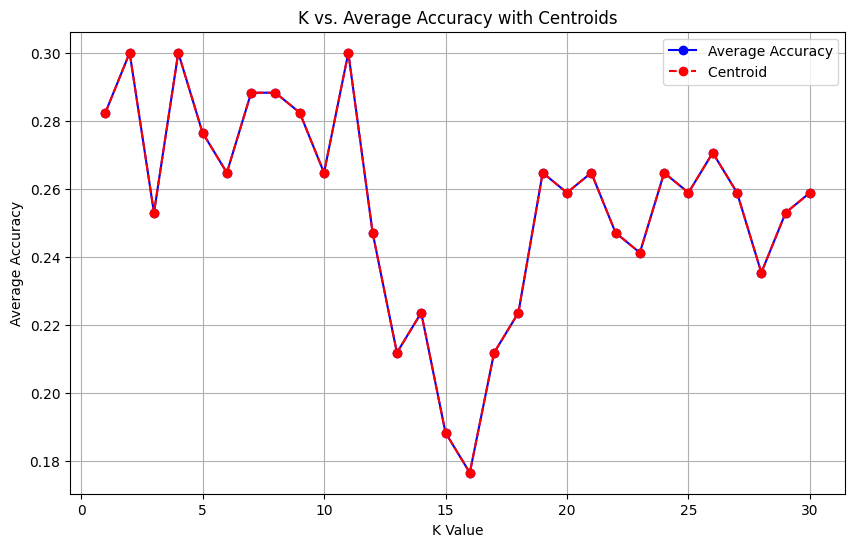

In [14]:
# Visualization of Average Accuracy vs. K Value with centroids for K-NN classifier

plt.figure(figsize=(10, 6))
plt.plot(list(average_accuracies.keys()), list(average_accuracies.values()), marker='o', linestyle='-', color='blue', label='Average Accuracy')


x_vals = list(average_accuracies.keys())
y_vals = list(average_accuracies.values())
plt.plot(x_vals, y_vals, marker='o', linestyle='--', color='red', label='Centroid ')

plt.xlabel('K Value')
plt.ylabel('Average Accuracy')
plt.title('K vs. Average Accuracy with Centroids')
plt.legend()
plt.grid(True)
plt.show()


This code visualizes the relationship between K values and average accuracy in K-NN classification, including a centroid line to represent the mean accuracy across different K values.